<a href="https://colab.research.google.com/github/PascalAdriantha/Sentiment-Analysis/blob/main/Sentiment_Analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split

In [ ]:
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datasetAwal = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Textblob Data/Data_TextBlobed_10000.csv")##[["tweets","labels"]]
dataset = datasetAwal.head(3000)
dataset["labels"] = dataset["labels"].replace('negative',0)
dataset["labels"] = dataset["labels"].replace('neutral', 1)
dataset["labels"] = dataset["labels"].replace('positive', 2)
dataset.sample(5)

<ipython-input-4-c5f4f4615cf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["labels"] = dataset["labels"].replace('negative',0)
<ipython-input-4-c5f4f4615cf1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["labels"] = dataset["labels"].replace('neutral', 1)
<ipython-input-4-c5f4f4615cf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,tweets,labels
2663,ChatGPT is impressive. Spent my night talking ...,2
1065,Hey @autodesk maybe don’t give this thing arms...,2
478,Just woke up to all the amazing examples for c...,2
309,OpenAI's new ChatGPT looks really good. For pr...,2
2784,ChatGPT is blowing my mind. Bravo @OpenAI 👏👏👏,1


In [ ]:
#create cleansing function

def cleanTweets(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) #menghapus mentions
  text = re.sub(r'#','', text) #menghapus hashtag
  text = re.sub(r'RT[\s]+','', text) #menghapus RT
  text = re.sub(r'https?:\/\/\S+','', text) #menghapus links
  text = re.sub('[^a-zA-Z]', ' ', text).lower() #mengubah huruf kecil, menghapus tanda baca dan simbol
  return text

dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)

dataset[["tweets", "Cleaned Tweets"]]

<ipython-input-5-cfca84ea98e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)


,tweets,Cleaned Tweets
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...",try talking with chatgpt our new ai system wh...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled to share that chatgpt our new model ...
4,"As of 2 minutes ago, @OpenAI released their ne...",as of minutes ago released their new chatg...
...,...,...
2995,ChatGPT https://t.co/heMojw0JUe,chatgpt
2996,Not sure if large language models are sentient...,not sure if large language models are sentient...
2997,I'm dead #ChatGPT https://t.co/KzQ2EjTlWb,i m dead chatgpt
2998,ChatGPT is a typical whataboutist. Next! https...,chatgpt is a typical whataboutist next


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def tokenizeTweet(text):
  tokenizedTweet = text.split()
  return tokenizedTweet
dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))

<ipython-input-7-268bb53e51f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()
def stopword_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])


dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))

from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-9-4f50e36f3e5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))
<ipython-input-9-4f50e36f3e5d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)


In [ ]:
dataset[["Tokenized", "Lemmatized and Stopword"]].head(25)

,Tokenized,Lemmatized and Stopword
0,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue
1,"[try, talking, with, chatgpt, our, new, ai, sy...",try talk chatgpt new ai system optimize dialog...
2,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue ai ma...
3,"[thrilled, to, share, that, chatgpt, our, new,...",thrill share chatgpt new model optimize dialog...
4,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use right
5,"[just, launched, chatgpt, our, new, ai, system...",launch chatgpt new ai system optimize dialogue
6,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use righ...
7,"[chatgpt, coming, out, strong, refusing, to, h...",chatgpt come strong refuse help stalk someone ...
8,"[penal, just, deployed, a, thing, i, ve, been,...",penal deploy thing help build last couple mont...
9,"[research, preview, of, our, newest, model, ch...",research preview newest model chatgpt n nwe tr...


In [ ]:
datasetNegative = dataset[ (dataset['labels']==0)]
datasetPositive = dataset[ (dataset['labels']==2)]

negativeList = datasetNegative['Lemmatized and Stopword'].tolist()
positiveList = datasetPositive['Lemmatized and Stopword'].tolist()

filtered_negative = ("").join(str(datasetNegative)) #convert the list into a string of spam
#filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(datasetPositive)) #convert the list into a string of spam
#filtered_positive = filtered_positive.lower()

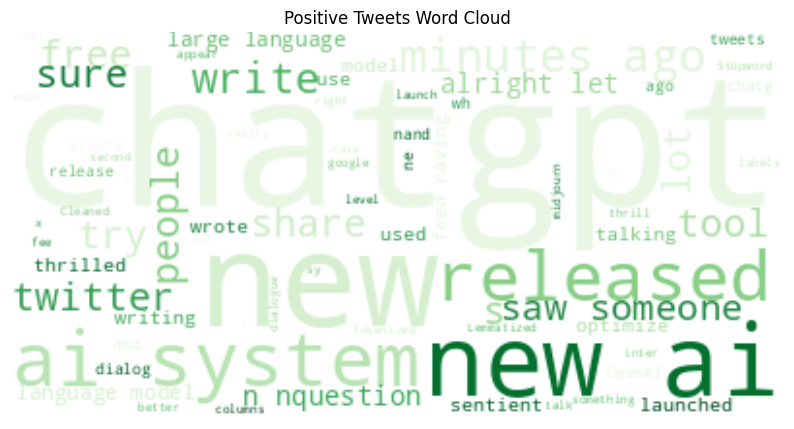

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Tweets Word Cloud")
plt.show()

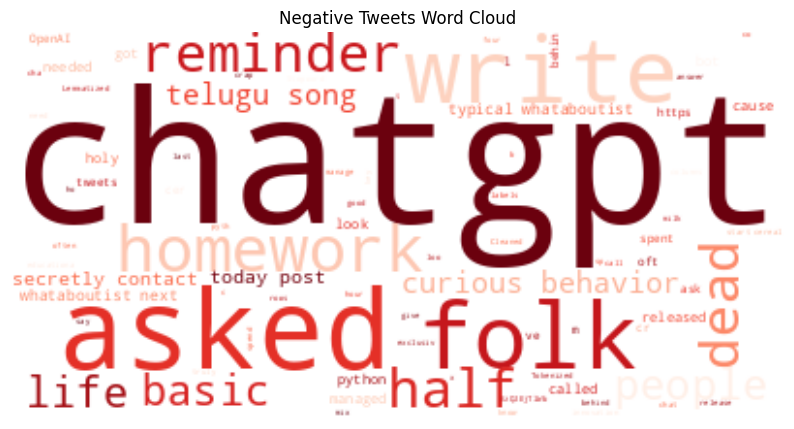

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Tweets Word Cloud")
plt.show()

In [ ]:
text = dataset["Lemmatized and Stopword"].tolist()
text

In [ ]:
y = dataset["labels"]
y = to_categorical(y)
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
dataset["labels"].value_counts()

2    1624
1    1001
0     375
Name: labels, dtype: int64

In [ ]:
from typing_extensions import Text
token = Tokenizer()
token.fit_on_texts(text)
####################################################################
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(text.values)
X = tokenizer.texts_to_sequences(text.values)
X = pad_sequences(X, maxlen = 100)

In [ ]:
token.index_word

In [ ]:
vocab = len(token.index_word)+1
print("vocab tokenized: ", vocab)

vocab tokenized:  5636


In [ ]:
x = ['hello my name is james my','this is my python ']
print("Text: 'hello my name is james my','this is my python notebook'")
print("Text to Sequence Result: ", token.texts_to_sequences(x)) 
y = token.texts_to_sequences(x)

Text: 'hello my name is james my','this is my python notebook'
Text to Sequence Result:  [[2281, 356], [156]]


In [ ]:
y

In [ ]:
encode_text = token.texts_to_sequences(text)
print(encode_text)
#y = encode_text

[[1, 42, 22, 11, 34], [16, 87, 1, 7, 5, 85, 42, 34, 252, 93, 112, 222], [1, 42, 22, 11, 34, 5, 223, 415, 416, 2, 1143, 5, 417, 369, 821, 77, 1383, 133, 1384, 418, 419, 649, 103, 1385, 1386], [2666, 420, 1, 7, 11, 42, 486, 732, 202, 1778, 171], [286, 343, 41, 7, 1, 2, 421, 8, 105], [236, 1, 7, 5, 85, 42, 34], [286, 343, 41, 7, 1, 2, 421, 8, 105, 2, 2], [1, 61, 733, 734, 93, 2667, 193, 521, 214, 193, 2668], [2669, 1387, 30, 93, 86, 186, 451, 370, 57, 115, 14, 29, 140, 420, 2670, 2], [194, 487, 1144, 11, 1, 2, 270, 16, 80, 7, 487, 202, 1145, 393, 171, 1779], [371, 372, 321, 822, 30, 960], [3, 1, 42, 22, 11, 34, 2671], [1, 42, 22, 11, 34, 5, 223, 415, 416, 2, 1143, 5, 417, 369, 821, 77, 1383, 133, 1384, 418, 419, 649, 103, 1385, 1386], [3, 822, 1, 11, 42, 34], [3, 1, 42, 22, 11, 34, 2], [5, 2672, 1, 42, 22, 11, 34, 5, 2673], [394, 1, 42, 22, 11, 34, 5, 2674, 373, 133], [5, 11, 305, 126, 31, 165, 74, 1780, 58, 488, 2675, 1, 115, 14, 522, 2, 2], [3, 1, 42, 22, 11, 34, 2], [4, 1, 7, 5, 85, 42

In [ ]:
max_kata = 100
X = pad_sequences(encode_text, maxlen = max_kata, padding="post")
X

array([[   1,   42,   22, ...,    0,    0,    0],
       [  16,   87,    1, ...,    0,    0,    0],
       [   1,   42,   22, ...,    0,    0,    0],
       ...,
       [1083,    1,    0, ...,    0,    0,    0],
       [   1, 2172, 5635, ...,    0,    0,    0],
       [1253,   49,  217, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40, test_size = 0.2, stratify = y)

## Balancing Dataset

In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(sampling_strategy="not majority")
X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)
print("Success")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Success


In [ ]:
y_train_ros

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
X_train = np.asarray(X_train_ros)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train_ros)
y_test = np.asarray(y_test)

In [ ]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab, vec_size, input_length = max_kata))
model.add(Conv1D(64, 8, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          1690800   
                                                                 
 conv1d (Conv1D)             (None, 93, 64)            153664    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 46, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 64)            0         
                                                                 
 dense (Dense)               (None, 46, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 46, 32)            0         
                                                        

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
122/122 [==============================] - 27s 203ms/step - loss: 1.0548 - accuracy: 0.4321 - val_loss: 1.0231 - val_accuracy: 0.5300
Epoch 2/10
122/122 [==============================] - 25s 201ms/step - loss: 0.7023 - accuracy: 0.7052 - val_loss: 0.8790 - val_accuracy: 0.6633
Epoch 3/10
122/122 [==============================] - 16s 129ms/step - loss: 0.3448 - accuracy: 0.8766 - val_loss: 0.8604 - val_accuracy: 0.7117
Epoch 4/10
122/122 [==============================] - 16s 129ms/step - loss: 0.1786 - accuracy: 0.9446 - val_loss: 0.9956 - val_accuracy: 0.7117
Epoch 5/10
122/122 [==============================] - 23s 190ms/step - loss: 0.1036 - accuracy: 0.9684 - val_loss: 1.1207 - val_accuracy: 0.7400
Epoch 6/10
122/122 [==============================] - 16s 131ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 1.2051 - val_accuracy: 0.7517
Epoch 7/10
122/122 [==============================] - 16s 131ms/step - loss: 0.0647 - accuracy: 0.9828 - val_loss: 1.2760 - val_ac

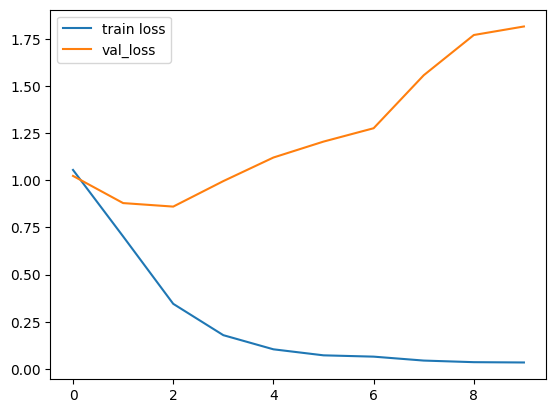

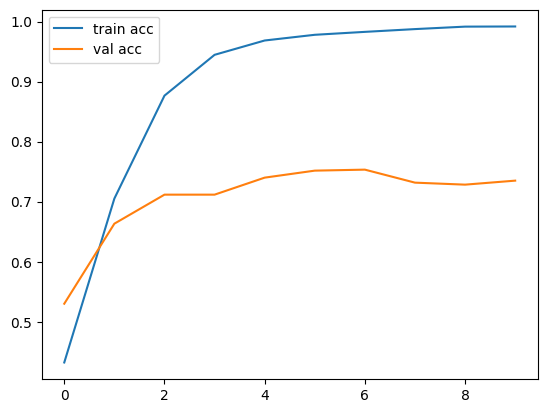

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['loss'], label = 'train loss')
plt.plot(model_fit.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#play accuracy
plt.plot(model_fit.history['accuracy'], label = 'train acc')
plt.plot(model_fit.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
Y_pred = np.argmax(model.predict(X_test,batch_size = 128), axis=-1)

5/5 [==============================] - 1s 132ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
df_test = pd.DataFrame({'true': y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix\n",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix
 [[ 34   8  33]
 [ 19 113  68]
 [ 21  10 294]]
              precision    recall  f1-score   support

           0       0.46      0.45      0.46        75
           1       0.86      0.56      0.68       200
           2       0.74      0.90      0.82       325

    accuracy                           0.73       600
   macro avg       0.69      0.64      0.65       600
weighted avg       0.75      0.73      0.73       600

